# Paquetes de Onda Gaussiano

## Darío Mitnik

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Transformada de Fourier
import scipy.fftpack

In [2]:
# Plotear acá o en ventana separada
%matplotlib inline
# %matplotlib qt

In [3]:
# Función a transformar
def wave2(x,lamb1,lamb2):
    y =  np.sin(2*np.pi/lamb1*x) + 3*np.sin(2*np.pi/lamb2*x)
    return y

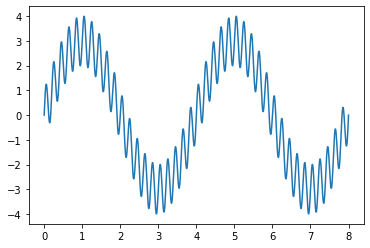

In [4]:
# Definimos y ploteamos la función 
lamb1 = 1/5
lamb2 = 4
x = np.linspace(0.0, 8, 1500)
y1 = wave2(x,lamb1,lamb2)
plt.plot(x,y1);

In [65]:
# Otra forma de ver visualización temporal

%matplotlib qt 

time = np.linspace(-4,4,5)
v = 0.3
for t in time:
    x0 = v*t
    y2 = wave2(x-x0,lamb1,lamb2)
    plt.plot(x,y2)
    plt.pause(0.75)

In [6]:
# En base a la definicion de lamb1 y lamb2, deberíamos obtener 
# picos en la transformada de Fourier, en k1 y k2
k1 = 2*np.pi/lamb1
k2 = 2*np.pi/lamb2
print('k1=',k1,' k2=',k2)

k1= 31.41592653589793  k2= 1.5707963267948966


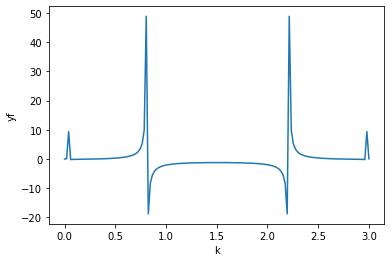

In [7]:
# Fourier Transform (without corrections)

N=150
x = np.linspace(0.0, 8, N)
y = wave2(x,lamb1,lamb2)
yf = scipy.fftpack.fft(y)
kf = np.linspace(0.0, 3, N)

%matplotlib inline


plt.xlabel("k");
plt.ylabel("yf");
plt.plot(kf,np.real(yf));

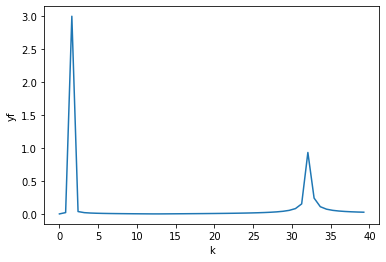

In [8]:
# Fourier Transform (corrected)

N=200
xmax = 8

# Fracción del espectro a plotear (N/nfrac)
# si nfrac=1 sale todo el espectro (N puntos)
# si nfrac=1 salen N/2 puntos,... etc.
nfrac = 4 # probar con nfrac=1,2,4, etc.

x = np.linspace(0.0, xmax, N)
y = wave2(x,lamb1,lamb2)
yf = scipy.fftpack.fft(y)

# k-grid
Nnoalias = int(N/nfrac)
dk = Nnoalias/xmax

# Normalization
yfplot = 2.0/N * abs(yf[0:Nnoalias])
kfplot = 2*np.pi * np.linspace(0.0, dk, Nnoalias )

plt.xlabel("k");
plt.ylabel("yf");
plt.plot(kfplot,yfplot);


## Paquete de Ondas

$ y(x) = \sum_i y_i(x) = \sum_i A_i \, \sin(  [ k_0 + i \times \Delta k  ] \, x)  $

In [14]:
# single component of the wavepacket

def ywavei(x,k0,Dk,Ai):
    arg = (k0+Dk)*x 
    return Ai*np.sin(arg)

$ \Delta k = \frac{k_0}{20} 
\\
A_i = \frac{10}{|i| + 10}
$

In [51]:
def wavepacket(x,k0,Dk,A,nwaves):
    
    nxpts = np.size(x)
    yy = np.zeros(nxpts)
    for i in range (nwaves):
        Ai = A/(abs(i)+A)
        Dki = Dk*i
        yy = yy + ywavei(x,k0,Dki,Ai)
        
    return yy


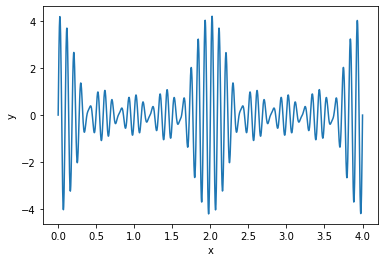

In [63]:
# Armamos un paquete centrado en k0=20 pi

Nx = 1500
lamb0=0.1
k0 = 2*np.pi/lamb0
nwaves = 5
xmax = 40*lamb0

x = np.linspace(0, xmax, Nx)

# wavepacket with npack waves, centered at f0
Dk = k0/20
A = 10
ypack = wavepacket(x,k0,Dk,A,nwaves)


# wavepacket with npacket waves, centered at k0
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,ypack);

# Ejercicio:

- Analizar los cambios en el paquete de onda, cambiando los parámetros
- Obtener un paquete muy definido en el espacio
- Obtener un paquete muy separado con picos muy separados
- Representar a estos paquetes en el espacio $k$ mediante la transformada de Fourier
- Mostrar que si las amplitudes $A_i$ tienen forma Gaussiana (en el espacio $k$), se obtiene un paquete Gaussiano en $x$

# Dependencia temporal 

# Ejercicio

- Agregar una dependencia temporal $(\omega t)$ a las funciones, y verificar si el paquete avanza con la velocidad de grupo correspondiente